In [1]:
# Install dependeincies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()

In [2]:
# Load data
start = '2021-01-01'
end = '2022-12-31'
# start = dt.datetime(2013, 1, 1)
# end = dt.datetime(2016, 1, 27)
df = pdr.get_data_yahoo("AAPL", start, end)
# print(df)
# df = web.DataReader('AAPL', 'yahoo', start='2019-09-10', end='2019-10-09')
# df = web.DataReader('AAPL', 'yahoo' ,start ,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,127.679985,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,129.258606,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,124.907555,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,129.169785,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,130.284714,105158200


In [3]:
df.shape


(503, 6)

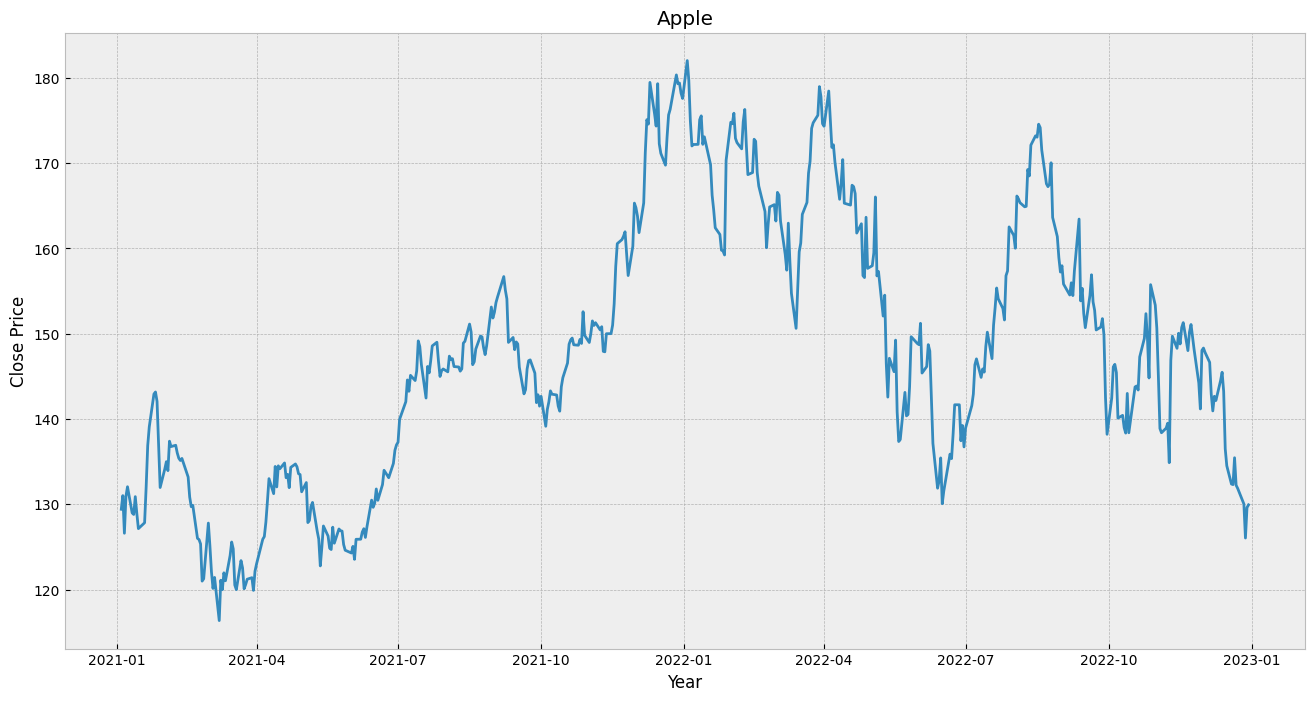

In [4]:
# Visualize the close price data
plt.figure(figsize=(16,8))
plt.title('Apple')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.show()

In [5]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,127.679985,143301900
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,129.258606,97664900
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,124.907555,155088000
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,129.169785,109578200
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,130.284714,105158200


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
498,2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900
499,2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800
500,2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400
501,2022-12-29,127.989998,130.479996,127.730003,129.610001,129.412415,75703700
502,2022-12-30,128.410004,129.949997,127.430000,129.929993,129.731918,76960600


In [7]:
# Get the close price
df = df[['Close']]
# df = df.drop(['Date'],axis)
df.head(4)

,Close
0,129.410004
1,131.009995
2,126.599998
3,130.919998


In [8]:
# Create a varible to predict 'x' days out into the future
future_days = 25

# Create a new column (target) shifted 'x' units/days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.head(4)

,Close,Prediction
0,129.410004,136.009995
1,131.009995,135.389999
2,126.599998,135.130005
3,130.919998,135.369995


In [9]:
df.tail(4)

,Close,Prediction
499,130.029999,NaN
500,126.040001,NaN
501,129.610001,NaN
502,129.929993,NaN


In [10]:
# Create the feature data set (x) and convert it into numparray and remove the last 'x' days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[129.41000366]
 [131.00999451]
 [126.59999847]
 [130.91999817]
 [132.05000305]
 [128.97999573]
 [128.80000305]
 [130.88999939]
 [128.91000366]
 [127.13999939]
 [127.83000183]
 [132.02999878]
 [136.86999512]
 [139.07000732]
 [142.91999817]
 [143.16000366]
 [142.05999756]
 [137.08999634]
 [131.96000671]
 [134.13999939]
 [134.99000549]
 [133.94000244]
 [137.38999939]
 [136.75999451]
 [136.91000366]
 [136.00999451]
 [135.38999939]
 [135.13000488]
 [135.36999512]
 [133.19000244]
 [130.83999634]
 [129.71000671]
 [129.86999512]
 [126.        ]
 [125.86000061]
 [125.34999847]
 [120.98999786]
 [121.26000214]
 [127.79000092]
 [125.12000275]
 [122.05999756]
 [120.12999725]
 [121.41999817]
 [116.36000061]
 [121.08999634]
 [119.98000336]
 [121.95999908]
 [121.02999878]
 [123.98999786]
 [125.56999969]
 [124.76000214]
 [120.52999878]
 [119.98999786]
 [123.38999939]
 [122.54000092]
 [120.08999634]
 [120.58999634]
 [121.20999908]
 [121.38999939]
 [119.90000153]
 [122.15000153]
 [123.        ]
 [125.90

C:\Users\AKK\AppData\Local\Temp\ipykernel_4160\3277309006.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['Prediction'], 1))[:-future_days]


In [11]:
# Create the target data set (y) an convert into a numpy array and get all of the target values except the last 'x rows'
Y = np.array(df['Prediction'])[:-future_days]
print(Y)

[136.00999451 135.38999939 135.13000488 135.36999512 133.19000244
 130.83999634 129.71000671 129.86999512 126.         125.86000061
 125.34999847 120.98999786 121.26000214 127.79000092 125.12000275
 122.05999756 120.12999725 121.41999817 116.36000061 121.08999634
 119.98000336 121.95999908 121.02999878 123.98999786 125.56999969
 124.76000214 120.52999878 119.98999786 123.38999939 122.54000092
 120.08999634 120.58999634 121.20999908 121.38999939 119.90000153
 122.15000153 123.         125.90000153 126.20999908 127.90000153
 130.36000061 133.         131.24000549 134.42999268 132.02999878
 134.5        134.16000366 134.83999634 133.11000061 133.5
 131.94000244 134.32000732 134.72000122 134.38999939 133.58000183
 133.47999573 131.46000671 132.53999329 127.84999847 128.1000061
 129.74000549 130.21000671 126.84999847 125.91000366 122.76999664
 124.97000122 127.44999695 126.26999664 124.84999847 124.69000244
 127.30999756 125.43000031 127.09999847 126.90000153 126.84999847
 125.27999878 124.

In [12]:
# Spiting the data into 75% traning and 25% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [13]:
# Create the model
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(X_train, Y_train)

# Create the linear regression model
lr = LinearRegression().fit(X_train, Y_train)

In [14]:
# Get the last 'x' rows of the feature data set
X_future = df.drop(['Prediction'], 1)[:-future_days]
# X_future
X_future = X_future.tail(future_days)
X_future = np.array(X_future)
X_future

C:\Users\AKK\AppData\Local\Temp\ipykernel_4160\605164691.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_future = df.drop(['Prediction'], 1)[:-future_days]


array([[143.38999939],
       [147.27000427],
       [149.44999695],
       [152.33999634],
       [149.3500061 ],
       [144.80000305],
       [155.74000549],
       [153.33999634],
       [150.6499939 ],
       [145.02999878],
       [138.88000488],
       [138.38000488],
       [138.91999817],
       [139.5       ],
       [134.86999512],
       [146.86999512],
       [149.69999695],
       [148.27999878],
       [150.03999329],
       [148.78999329],
       [150.72000122],
       [151.28999329],
       [148.00999451],
       [150.17999268],
       [151.07000732]])

In [15]:
# Show model tree prediction
tree_prediction = tree.predict(X_future)
print(tree_prediction)
print()

# Show the model linear regression prediction
lr_prediction = lr.predict(X_future)
print(lr_prediction)

[149.32000732 155.11000061 141.16999817 148.02999878 148.30999756
 147.80999756 146.63000488 176.27999878 140.94000244 142.6499939
 142.16000366 147.88999939 164.86999512 143.21000671 136.5
 147.53999329 132.36999512 132.30000305 135.44999695 132.22999573
 131.86000061 130.02999878 126.04000092 129.61000061 143.42999268]

[145.46237746 147.7968943  149.10854976 150.84740125 149.04838739
 146.31074683 152.89311481 151.44908009 149.83056254 146.44913039
 142.74880919 142.44796977 142.77287231 143.12184714 140.33607117
 147.55621725 149.25896947 148.40458662 149.46353808 148.71143953
 149.87268446 150.21563663 148.24213076 149.54777275 150.08327573]


C:\Users\AKK\AppData\Local\Temp\ipykernel_4160\1521810972.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = Predictions


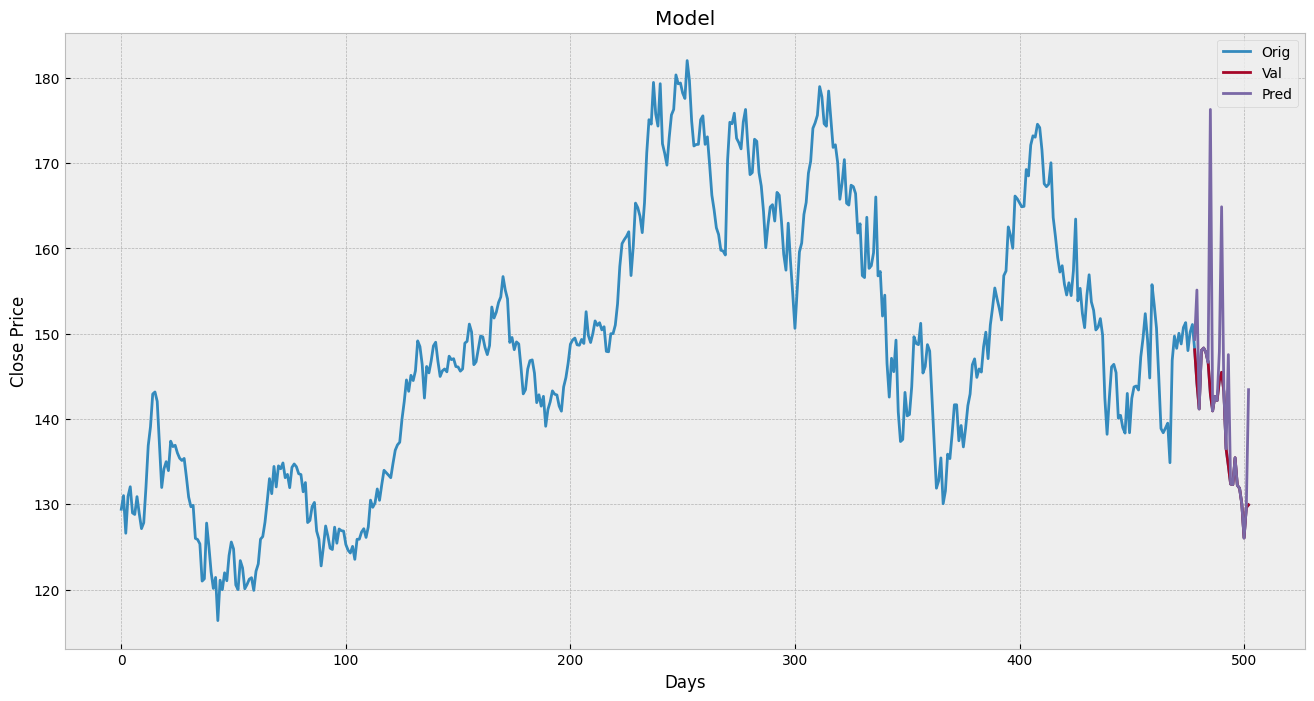

In [16]:
# Visulalize the data
Predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = Predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

C:\Users\AKK\AppData\Local\Temp\ipykernel_4160\3959655313.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = Predictions


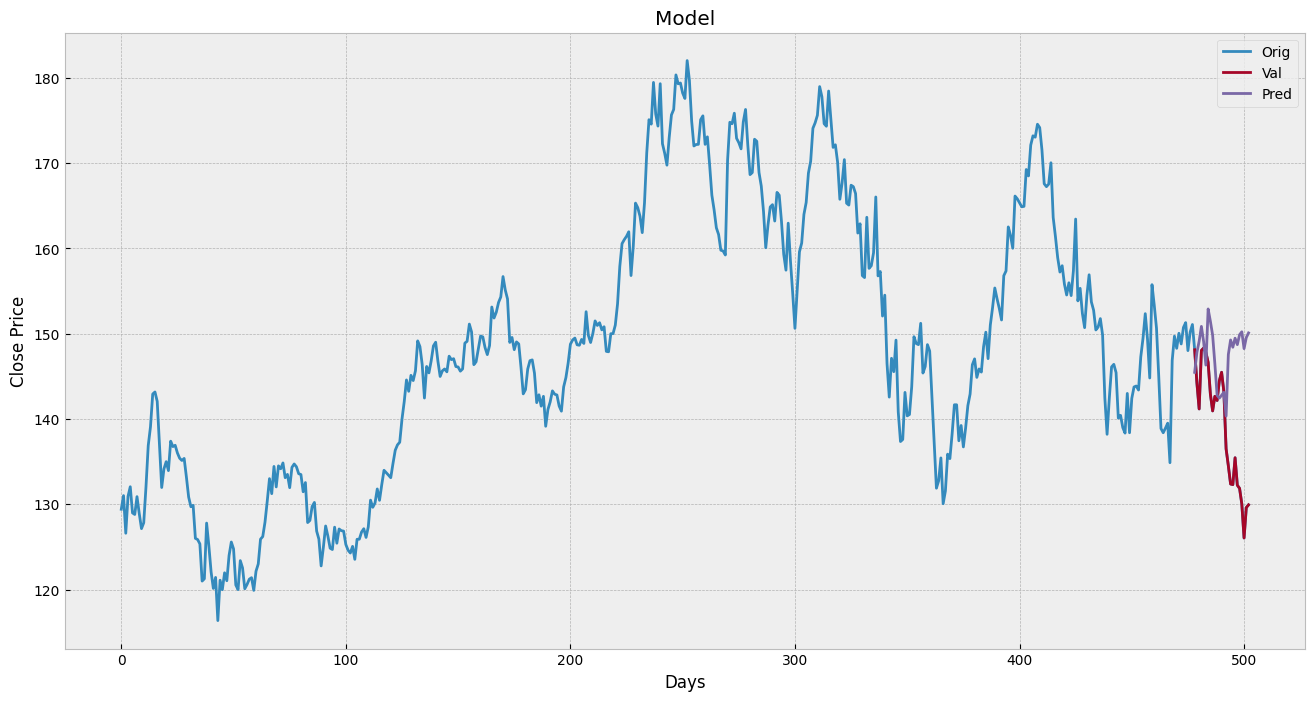

In [17]:
# Visulalize the data
Predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = Predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()

In [18]:
start = '2010-01-01'
end = '2022-12-31'
# start = dt.datetime(2013, 1, 1)
# end = dt.datetime(2016, 1, 27)
df = pdr.get_data_yahoo("AAPL", start, end)
# print(df)
# df = web.DataReader('AAPL', 'yahoo', start='2019-09-10', end='2019-10-09')
# df = web.DataReader('AAPL', 'yahoo' ,start ,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505281,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412872,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443575,447610800


In [19]:
 df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.658981,63814900
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.831772,69007800
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.847855,85438400
2022-12-29,127.989998,130.479996,127.730003,129.610001,129.412415,75703700
2022-12-30,128.410004,129.949997,127.430000,129.929993,129.731918,76960600


In [20]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.505281,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.516527,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.412872,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.401018,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.443575,447610800


In [21]:
# Removing date and aj close column
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


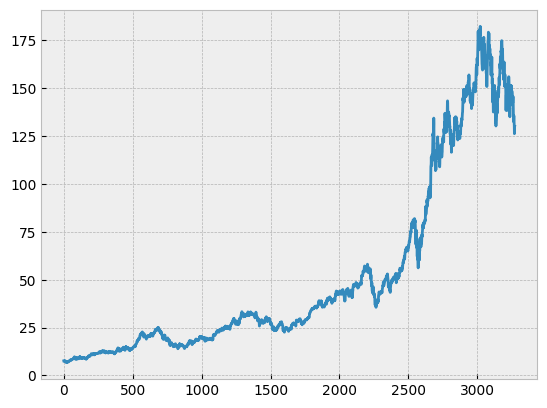

In [22]:
# Visualizing Close
 plt.plot(df.Close)

In [23]:
# Finding moving average of 100 days
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3267    150.515600
3268    150.157800
3269    149.764699
3270    149.412100
3271    149.062199
Name: Close, Length: 3272, dtype: float64

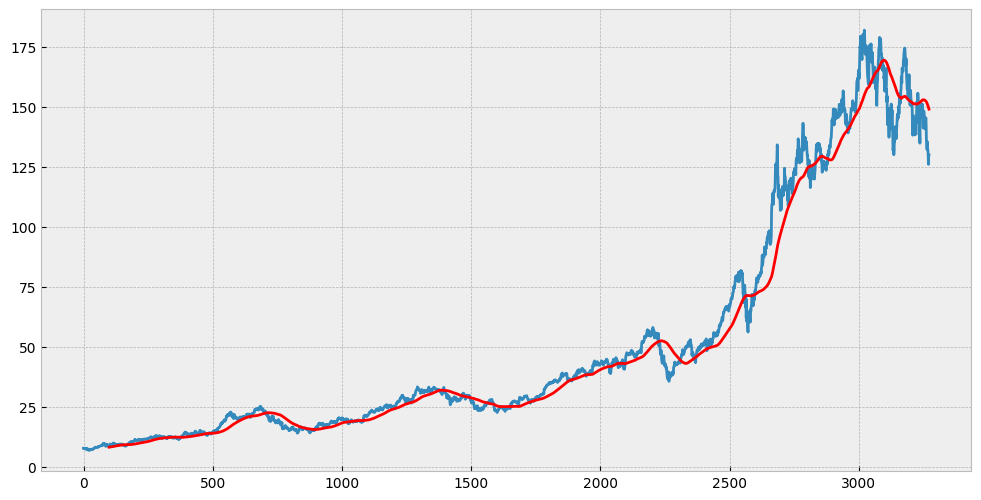

In [24]:
# Visualize 100 days moving average 
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [25]:
# Finding 200 days moving average
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3267    152.1331
3268    152.0096
3269    151.8867
3270    151.7593
3271    151.6110
Name: Close, Length: 3272, dtype: float64

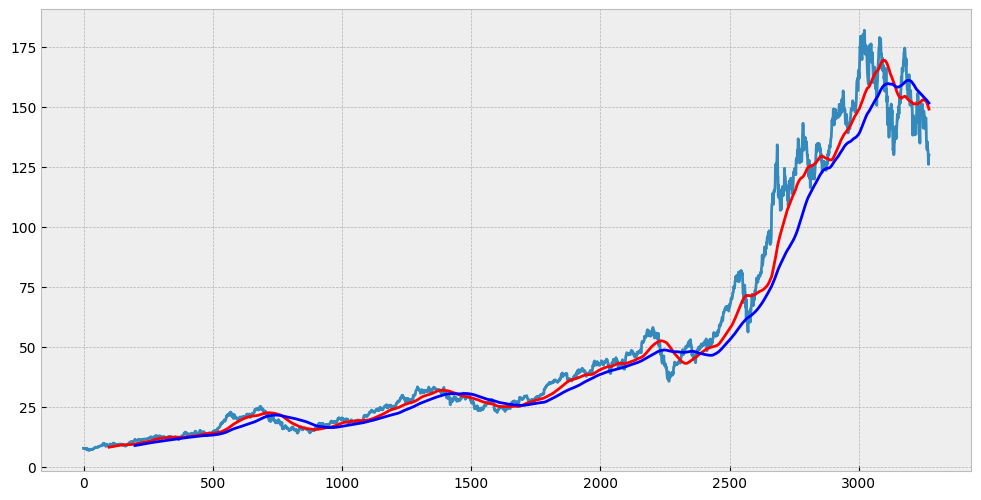

In [26]:
# Visualize 200 days moving average
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'b')

In [27]:
df.shape

(3272, 5)

In [28]:
# Spliting data into traning and testing

data_traning = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_traning.shape)
print(data_testing.shape)

(2290, 1)
(982, 1)


In [29]:
data_traning.head()

,Close
0,7.643214
1,7.656429
2,7.534643
3,7.520714
4,7.570714


In [30]:
data_testing.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [31]:
from sklearn.preprocessing import MinMaxScaler
# Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))

In [32]:
data_traning_array = scaler.fit_transform(data_traning)
data_traning_array

array([[0.01533047],
       [0.01558878],
       [0.01320823],
       ...,
       [0.71710501],
       [0.71739828],
       [0.70127194]])

In [33]:
data_traning_array.shape

(2290, 1)

In [34]:
x_train = []
y_train = []

for i in range(100, data_traning_array.shape[0]):
    x_train.append(data_traning_array[i-100: i])
    y_train.append(data_traning_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)    

In [35]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [36]:
model = Sequential()
model.add(LSTM(units = 50, activation='relu', return_sequences=True,
              input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))


In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [38]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
69/69 [==============================] - 25s 290ms/step - loss: 0.0378
Epoch 2/50
69/69 [==============================] - 12s 173ms/step - loss: 0.0072
Epoch 3/50
69/69 [==============================] - 10s 139ms/step - loss: 0.0060
Epoch 4/50
69/69 [==============================] - 10s 141ms/step - loss: 0.0053
Epoch 5/50
69/69 [==============================] - 10s 150ms/step - loss: 0.0053
Epoch 6/50
69/69 [==============================] - 10s 151ms/step - loss: 0.0051
Epoch 7/50
69/69 [==============================] - 11s 154ms/step - loss: 0.0046
Epoch 8/50
69/69 [==============================] - 11s 161ms/step - loss: 0.0046
Epoch 9/50
69/69 [==============================] - 10s 148ms/step - loss: 0.0040
Epoch 10/50
69/69 [==============================] - 11s 164ms/step - loss: 0.0038
Epoch 11/50
69/69 [==============================] - 13s 182ms/step - loss: 0.0040
Epoch 12/50
69/69 [==============================] - 11s 167ms/step - loss: 0.0039
Epoch 13/50
6

In [39]:
model.save('kera_model.h5')

In [40]:
data_traning.tail(100)

,Close
2190,55.959999
2191,54.470001
2192,54.560001
2193,54.592499
2194,55.007500
...,...
2285,41.630001
2286,42.812500
2287,43.544998
2288,43.560001


In [41]:
data_testing.head()

,Close
2290,42.602501
2291,42.357498
2292,42.722500
2293,42.544998
2294,42.700001


In [42]:
past_100_days = data_traning.tail(100)

In [43]:
final_df = past_100_days.append(data_testing, ignore_index=True)

C:\Users\AKK\AppData\Local\Temp\ipykernel_4160\531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [44]:
final_df.head()

,Close
0,55.959999
1,54.470001
2,54.560001
3,54.592499
4,55.007500


In [45]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.13937014],
       [0.1291969 ],
       [0.1298114 ],
       ...,
       [0.61785443],
       [0.64222927],
       [0.64441407]])

In [46]:
input_data.shape


(1082, 1)

In [47]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [48]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(982, 100, 1)
(982,)


In [49]:
y_predicted = model.predict(x_test)

31/31 [==============================] - 1s 34ms/step


In [50]:
y_predicted.shape

(982, 1)

In [51]:
y_test

array([0.04816933, 0.04649653, 0.04898865, 0.04777672, 0.04883503,
       0.04818639, 0.04905691, 0.05093454, 0.04927882, 0.05253905,
       0.05468976, 0.05486046, 0.05578219, 0.05284628, 0.05595289,
       0.05745499, 0.05690876, 0.05518478, 0.05173679, 0.05243663,
       0.06266108, 0.06609201, 0.06745755, 0.07090551, 0.07498506,
       0.07822822, 0.0756849 , 0.07846719, 0.09029614, 0.08340019,
       0.07945721, 0.07612869, 0.07899633, 0.07942306, 0.08152257,
       0.08372451, 0.08846975, 0.09073996, 0.09132031, 0.09355637,
       0.09884784, 0.09782367, 0.09973542, 0.09688486, 0.09674831,
       0.0973628 , 0.09739694, 0.10401981, 0.10526585, 0.10640949,
       0.1114449 , 0.1108987 , 0.10768968, 0.1060169 , 0.10654605,
       0.09982077, 0.11663396, 0.11429546, 0.11873346, 0.11315182,
       0.10355893, 0.1036272 , 0.09990612, 0.0938636 , 0.0743023 ,
       0.07932065, 0.08317828, 0.08174448, 0.079901  , 0.06981308,
       0.0758044 , 0.06928394, 0.06395836, 0.06278058, 0.06151

In [52]:
y_predicted


array([[0.12063444],
       [0.12213065],
       [0.12365696],
       [0.12513205],
       [0.12648994],
       [0.12768841],
       [0.1287044 ],
       [0.12953685],
       [0.13020939],
       [0.13074803],
       [0.13119459],
       [0.1316005 ],
       [0.13200921],
       [0.13245334],
       [0.13293643],
       [0.13346106],
       [0.13403082],
       [0.13463953],
       [0.13526547],
       [0.13586664],
       [0.13640624],
       [0.13690743],
       [0.13742252],
       [0.13800217],
       [0.13869402],
       [0.13954186],
       [0.14057824],
       [0.14179379],
       [0.1431633 ],
       [0.14470242],
       [0.14638153],
       [0.14812528],
       [0.1498318 ],
       [0.15142107],
       [0.15283895],
       [0.15406504],
       [0.15511133],
       [0.15602621],
       [0.15687358],
       [0.15770979],
       [0.15858364],
       [0.15955013],
       [0.16063525],
       [0.16184649],
       [0.16315341],
       [0.16450763],
       [0.16585922],
       [0.167

In [53]:
scaler.scale_

array([0.00682769])

In [54]:
scale_factor = 1/0.00332369
y_predicted = y_predicted*scale_factor
y_test = y_test*scale_factor
y_predicted

array([[ 36.295334],
       [ 36.7455  ],
       [ 37.20472 ],
       [ 37.648533],
       [ 38.05708 ],
       [ 38.417664],
       [ 38.723347],
       [ 38.97381 ],
       [ 39.17615 ],
       [ 39.338215],
       [ 39.472572],
       [ 39.594696],
       [ 39.717667],
       [ 39.85129 ],
       [ 39.99664 ],
       [ 40.154484],
       [ 40.32591 ],
       [ 40.509052],
       [ 40.69738 ],
       [ 40.878254],
       [ 41.040604],
       [ 41.191395],
       [ 41.34637 ],
       [ 41.52077 ],
       [ 41.728928],
       [ 41.98402 ],
       [ 42.295834],
       [ 42.661556],
       [ 43.0736  ],
       [ 43.53668 ],
       [ 44.04187 ],
       [ 44.566513],
       [ 45.079956],
       [ 45.55812 ],
       [ 45.98472 ],
       [ 46.353615],
       [ 46.66841 ],
       [ 46.943672],
       [ 47.19862 ],
       [ 47.45021 ],
       [ 47.713127],
       [ 48.003914],
       [ 48.330395],
       [ 48.69482 ],
       [ 49.088036],
       [ 49.49548 ],
       [ 49.902134],
       [ 50.2

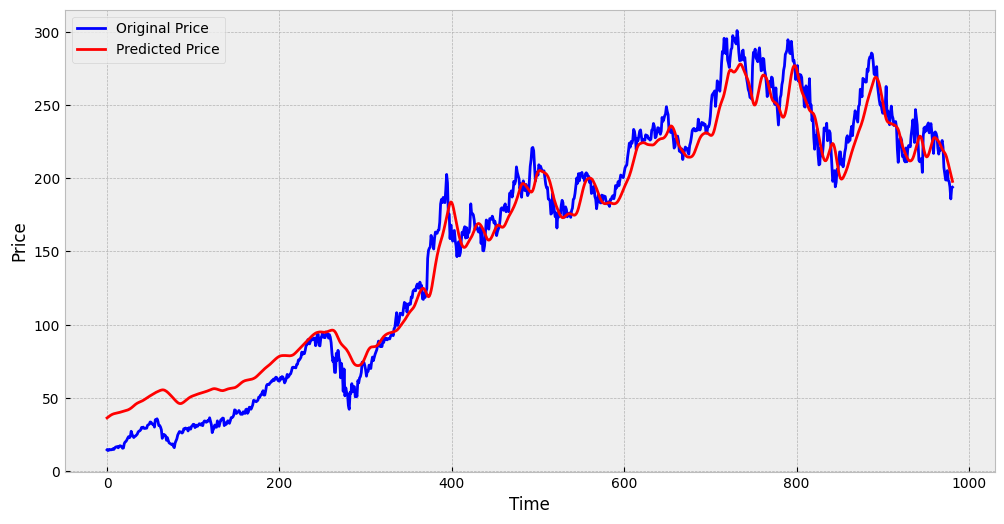

In [55]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()